# Intro

# Importing Data
# start with importing messy data set but then use metal stuff for the rest of the teaching example

In [2]:
import requests

# URL locations of data
master_death_metal_bands = "https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/bands.csv"
master_metal_bands = "https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/metal_bands_2017.csv"
master_world_pop = "https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/world_population_1960_2015.csv"

# Grab the metal bands data
req = requests.get(master_death_metal_bands)
death_metal_bands_data = req.text

# Grab the metal bands data
req = requests.get(master_metal_bands)
metal_bands_data = req.text

# Grab the world population data
req = requests.get(master_world_pop)
world_pop_data = req.text

In [3]:
import pandas as pd

## A Realistic Depiction of Getting Data into Python

Exciting! We have some fresh new cyclic voltammetry data to analyze. Fortuitously, `pandas` has a function called `read_csv` design for loading tabular data. Let's do it!

In [4]:
pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/cyclic_voltammetry_output.txt")

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xb2 in position 1135: invalid start byte

Ahhh! Our loading failed terribly! Let's take a look at our file to see what might be amiss.

It looks like our data doesn't actually start until line 81, as indicated by "Nb header lines: 81" on the second line. May have been wise to look at our file first, but eh, lesson learned.

Ok, now we need to turn to the [pandas documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for help. Like a good programmer, I'll google it to find the key word arguments that we can use to modify `read_csv`.

... google "how to skip lines in pd read csv" ...

Aha! The keyword `skiprows` appears to be what we are looking for. It's description states "Line numbers to skip (0-indexed) or number of lines to skip (int) at the start of the file." There are 81 lines, but the line numbers to skip are 0-indexed, which means that we will want `skiprows` to have a value of 80. Let's give it a try!

In [5]:
pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/cyclic_voltammetry_output.txt", skiprows=80, encoding='mac_roman')

,mode\tox/red\terror\tcontrol changes\tNs changes\tcounter inc.\tNs\ttime/s\tcontrol/V/mA\tEwe/V\tdq/mA.h\tEce/V\tP/W\t<I>/mA\tEwe-Ece/V\tx\t(Q-Qo)/mA.h\tCapacity/mA.h
0,3\t1\t0\t0\t0\t0\t0\t0.0002\t0\t3.13411832\t0\...
1,3\t1\t0\t0\t0\t0\t0\t60.0002\t0\t3.13436651\t0...
2,3\t1\t0\t0\t0\t0\t0\t120.0002\t0\t3.13472915\t...
3,3\t1\t0\t0\t0\t0\t0\t180.0002\t0\t3.13482451\t...
4,3\t1\t0\t0\t0\t0\t0\t240.0002\t0\t3.13497734\t...
...,...
23215,1\t0\t0\t0\t0\t0\t1\t417662.4821\t-0.01425\t2....
23216,1\t0\t0\t0\t0\t0\t1\t417699.5241\t-0.01425\t2....
23217,1\t0\t0\t0\t0\t0\t1\t417733.6881\t-0.01425\t2....
23218,1\t0\t0\t0\t0\t0\t1\t417733.6951\t-0.01425\t2....


The columns aren't separated and we have `\t` characters all over the place, but still, progress! The `\t` characters are the separators in our data file, meaning our file is `tab`-seperated. Even though `csv` stands for Comma Seperated Values, other seperator characters are also common.

... google "how to specify separator in pd" ...

Looks like we can specify the type of separator by including the `sep` keyword. Let's do it!

In [6]:
pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/cyclic_voltammetry_output.txt", skiprows=80, sep='\t', encoding='mac_roman')

,mode,ox/red,error,control changes,Ns changes,counter inc.,Ns,time/s,control/V/mA,Ewe/V,dq/mA.h,Ece/V,P/W,<I>/mA,Ewe-Ece/V,x,(Q-Qo)/mA.h,Capacity/mA.h
0,3,1,0,0,0,0,0,0.0002,0.00000,3.134118,0.000000e+00,-0.002699,0.000000,0.000000,3.136817,0.000000,0.000000,0.000000
1,3,1,0,0,0,0,0,60.0002,0.00000,3.134367,0.000000e+00,-0.002604,0.000000,0.000000,3.136970,0.000000,0.000000,0.000000
2,3,1,0,0,0,0,0,120.0002,0.00000,3.134729,0.000000e+00,-0.002527,0.000000,0.000000,3.137256,0.000000,0.000000,0.000000
3,3,1,0,0,0,0,0,180.0002,0.00000,3.134825,0.000000e+00,-0.002527,0.000000,0.000000,3.137352,0.000000,0.000000,0.000000
4,3,1,0,0,0,0,0,240.0002,0.00000,3.134977,0.000000e+00,-0.002355,0.000000,0.000000,3.137333,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23215,1,0,0,0,0,0,1,417662.4821,-0.01425,2.021435,-1.447666e-04,0.016924,0.000029,-0.014246,2.004511,1.917172,-0.328737,0.135839
23216,1,0,0,0,0,0,1,417699.5241,-0.01425,2.020919,-1.465844e-04,0.016771,0.000029,-0.014246,2.004148,1.918027,-0.328884,0.135986
23217,1,0,0,0,0,0,1,417733.6881,-0.01425,2.020404,-1.351955e-04,0.016962,0.000029,-0.014246,2.003442,1.918815,-0.329019,0.136121
23218,1,0,0,0,0,0,1,417733.6951,-0.01425,2.020938,-2.770032e-08,0.016790,0.000029,-0.014246,2.004148,1.918815,-0.329019,0.136121


Yay! We've successfully imported our DataFrame. Sometimes it just takes a little tinkering. We are going to move on to a nicer dataset for the rest of the workshop but hopefully this has given you a realistic view of how to troubleshoot your imports!

In the next cell, we will import our data directly from a file hosted on GitHub. This is no harder than loading a `.csv` file on our local computer. We'll use this sick death metal data going forward.

In [7]:
# Make a data frame
metal_bands_df = pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/metal_bands_2017.csv")
world_pop_df = pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/world_population_1960_2015.csv")
bands_df = pd.read_csv("https://raw.githubusercontent.com/orioncohen/metal-bands-by-nation/main/new_bands.csv")

# What is our data? 

Let's take a look at our data to see what we're working with! We can look at just the first set of lines with the `head()` function. 

In [8]:
bands_df.head()

,Unnamed: 0,id,name,country,status,formed_in,genre,theme,active,ended_in
0,2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-2022,2022
1,4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002,2002
2,6,7,1917,Argentina,Active,1994.0,Death Metal,Dark Philosophical Poetry,1994-2022,2022
3,7,8,5th Column,United States,Active,2003.0,Death Metal,War,2003-2022,2022
4,9,10,602,Russia,Active,2012.0,Death Metal,Cruelty of regimes,2012-2022,2022


In [9]:
bands_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12024 entries, 0 to 12023
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  12024 non-null  int64  
 1   id          12024 non-null  int64  
 2   name        12024 non-null  object 
 3   country     12024 non-null  object 
 4   status      12024 non-null  object 
 5   formed_in   12024 non-null  float64
 6   genre       12024 non-null  object 
 7   theme       12024 non-null  object 
 8   active      12024 non-null  object 
 9   ended_in    12024 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 939.5+ KB


Looks like we know a bunch of information about each metal band! We have their `'name'`, their `'country'`, their `'genre'`...even the years that they were `'active'`! These are the columns of this data frame. Note that the `'id'` is different from the row number: `'id'` is a column in the data frame, so if we sorted the data differently, those would be reordered. 

Now let's check out our other data!

In [10]:
world_pop_df.head()

,Unnamed: 0,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,0,Aruba,54208.0,55435.0,56226.0,56697.0,57029.0,57360.0,57712.0,58049.0,...,100830.0,101218.0,101342.0,101416.0,101597.0,101936.0,102393.0,102921.0,103441.0,103889.0
1,1,Andorra,13414.0,14376.0,15376.0,16410.0,17470.0,18551.0,19646.0,20755.0,...,83373.0,84878.0,85616.0,85474.0,84419.0,82326.0,79316.0,75902.0,72786.0,70473.0
2,2,Afghanistan,8994793.0,9164945.0,9343772.0,9531555.0,9728645.0,9935358.0,10148841.0,10368600.0,...,25183615.0,25877544.0,26528741.0,27207291.0,27962207.0,28809167.0,29726803.0,30682500.0,31627506.0,32526562.0
3,3,Angola,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,5962831.0,...,18541467.0,19183907.0,19842251.0,20520103.0,21219954.0,21942296.0,22685632.0,23448202.0,24227524.0,25021974.0
4,4,Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2904780.0,2900247.0,2896652.0,2893654.0,2889167.0


Here, the `'Unnamed: 0'` column is 0-index instead of 1-indexed...this is why it's helpful to take a peek at the dataframe itself!

Ok, looks like the world population data is something we could use along with the bands data. Let's see if we can make a column called `'country_population'` in the bands dataframe that has the population of the country for that band. 

There are a couple different ways to add a column. If we had the data for the column as a list, we could do it like this:

`band_df["country_population"] = [283464, 1283389, ...]`

Or if we wanted to put this information at a particular spot in the dataframe, we could use the `insert()` function:

`band_df.insert(3, "country_population", [452342, 15425324, ...])`

However, our best option will be the `assign()` function, because this provides a place for us to specify how to fill up the column:

`band_df = band_df.assign(country_population = np.random.randint(10))`

Except we need to figure out how to fetch the actual population number, rather than filling in a random number, of course!

So, how do we get a particular element from our `world_pop_df`?

In [11]:
bands_df['country'].value_counts()

United States    2460
Germany           780
Brazil            728
Italy             499
Sweden            438
                 ... 
Turkmenistan        1
Angola              1
Suriname            1
Azerbaijan          1
Kenya               1
Name: country, Length: 119, dtype: int64

In [12]:
world_pop_df['Country Name']

0              Aruba
1            Andorra
2        Afghanistan
3             Angola
4            Albania
           ...      
264           Taiwan
265         Guernsey
266          Reunion
267    Åland Islands
268           Jersey
Name: Country Name, Length: 269, dtype: object

# Cleaning the data

What happens if there are no values in some of our cells? This can be a nuiscance when trying to do certain types of analysis. Let's start by removing any rows with missing values in our bands dataframe.

In [13]:
bands_df = bands_df.dropna()
bands_df.head()

,Unnamed: 0,id,name,country,status,formed_in,genre,theme,active,ended_in
0,2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-2022,2022
1,4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002,2002
2,6,7,1917,Argentina,Active,1994.0,Death Metal,Dark Philosophical Poetry,1994-2022,2022
3,7,8,5th Column,United States,Active,2003.0,Death Metal,War,2003-2022,2022
4,9,10,602,Russia,Active,2012.0,Death Metal,Cruelty of regimes,2012-2022,2022


# Creating a column

The 'formed_in', 'active', and 'ended_in' columns are all amazingly useful data, but right now we don't have a column that just tells us the age of each band, let's make that column. Note that currently most of the data in the table is stored as strings, so to do subtraction we need to change the string to a float using 'astype'.

In [14]:
bands_df["age"] = bands_df["ended_in"].astype(float) - bands_df["formed_in"].astype(float)
bands_df.head()

,Unnamed: 0,id,name,country,status,formed_in,genre,theme,active,ended_in,age
0,2,3,.F.O.A.D.,France,Active,2009.0,Death Metal,Life and Death,2009-2022,2022,13.0
1,4,5,12 Days of Anarchy,United States,Split-up,1998.0,Death Metal,Anarchy,1998-2002,2002,4.0
2,6,7,1917,Argentina,Active,1994.0,Death Metal,Dark Philosophical Poetry,1994-2022,2022,28.0
3,7,8,5th Column,United States,Active,2003.0,Death Metal,War,2003-2022,2022,19.0
4,9,10,602,Russia,Active,2012.0,Death Metal,Cruelty of regimes,2012-2022,2022,10.0


# Combining the bands and population data
## How many metal bands does each country have per capita in 2015? 

How do we get the specific countries out of our world population data frame to add population information to our bands dataframe? We need to use the merge function!!

Let's start by creating a new table using just the data we need from the 'bands' dataframe. We only need the country names, and the counts of how many times those country names appear in the table. 

We can use the function 'value_counts()' on the 'country' column in order to get how many times each country appears in the table. In order to get the country names as part of the dataframe that we can actually access we need to use the 'rename_axis' function. We then can use the 'reset_index' function in order to give our new column of value counts a useful name.
Note that I'm calling our column of country names the same as the column label in the world population dataframe, this will make merging the tables easier!!

In [15]:
bands_pop = bands_df["country"].value_counts()
bands_pop = bands_pop.rename_axis("Country Name")
bands_pop = bands_pop.reset_index(name="num_bands")
bands_pop.head()

,Country Name,num_bands
0,United States,2460
1,Germany,780
2,Brazil,728
3,Italy,499
4,Sweden,438


Since our bands_pop and world_pop_df have columns with the same label the merge function will automatically merge the two dataframes so that the data in those matching columns align. 

In [16]:
bands_pop = bands_pop.merge(world_pop_df)
bands_pop.head()

,Country Name,num_bands,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,United States,2460,248,180671000.0,183691000.0,186538000.0,189242000.0,191889000.0,194303000.0,196560000.0,...,298379912.0,301231207.0,304093966.0,306771529.0,309346863.0,311718857.0,314102623.0,316427395.0,318907401.0,321418820.0
1,Germany,780,52,72814900.0,73377632.0,74025784.0,74714353.0,75318337.0,75963695.0,76600311.0,...,82376451.0,82266372.0,82110097.0,81902307.0,81776930.0,81797673.0,80425823.0,82132753.0,80982500.0,81413145.0
2,Brazil,728,27,72493585.0,74706888.0,77007549.0,79368453.0,81751802.0,84130061.0,86494987.0,...,190698241.0,192784521.0,194769696.0,196701298.0,198614208.0,200517584.0,202401584.0,204259377.0,206077898.0,207847528.0
3,Italy,499,113,50199700.0,50536350.0,50879450.0,51252000.0,51675350.0,52112350.0,52519000.0,...,58143979.0,58438310.0,58826731.0,59095365.0,59277417.0,59379449.0,59539717.0,60233948.0,60789140.0,60802085.0
4,Sweden,438,220,7484656.0,7519998.0,7561588.0,7604328.0,7661354.0,7733853.0,7807797.0,...,9080505.0,9148092.0,9219637.0,9298515.0,9378126.0,9449213.0,9519374.0,9600379.0,9696110.0,9798871.0


We now have our table set up in a useful way, let's look at how many metal bands there were per capita in 2015. 

In [22]:
bands_pop.dropna(inplace=True)
#print(bands_pop.to_string())
bands_pop["per_capita"] = bands_pop["num_bands"].astype(float) / bands_pop["2015"].astype(float)
bands_pop = bands_pop.sort_values(by=["per_capita"], ascending=False)
bands_pop.head()

,Country Name,num_bands,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,per_capita
8,Finland,375,72,4429634.0,4461005.0,4491443.0,4523309.0,4548543.0,4563732.0,4580869.0,...,5288720.0,5313399.0,5338871.0,5363352.0,5388272.0,5413971.0,5438972.0,5461512.0,5482013.0,0.000068
94,Faroe Islands,3,75,34266.0,34730.0,35153.0,35550.0,35946.0,36363.0,36804.0,...,48599.0,48629.0,48613.0,48567.0,48492.0,48393.0,48292.0,48221.0,48199.0,0.000062
4,Sweden,438,220,7484656.0,7519998.0,7561588.0,7604328.0,7661354.0,7733853.0,7807797.0,...,9148092.0,9219637.0,9298515.0,9378126.0,9449213.0,9519374.0,9600379.0,9696110.0,9798871.0,0.000045
70,Iceland,11,111,175574.0,179029.0,182378.0,185653.0,188983.0,192286.0,195570.0,...,311566.0,317414.0,318499.0,318041.0,319014.0,320716.0,323764.0,327386.0,330823.0,0.000033
104,Monaco,1,147,22454.0,22812.0,23042.0,23169.0,23237.0,23283.0,23304.0,...,35046.0,35731.0,36351.0,36845.0,37189.0,37404.0,37528.0,37623.0,37731.0,0.000027


Those numbers are annoyingly small, let's do it per million residents by multiplying our new column by a constant factor. Since our table is sorted by descending per capita counts, looking at the first few rows will tell us which countries have the most metal bands per capita!

In [36]:
bands_pop["per_capita"] = bands_pop["per_capita"] * 1000000
bands_pop[:20]

,Country Name,num_bands,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,per_capita
8,Finland,375,72,4429634.0,4461005.0,4491443.0,4523309.0,4548543.0,4563732.0,4580869.0,...,5288720.0,5313399.0,5338871.0,5363352.0,5388272.0,5413971.0,5438972.0,5461512.0,5482013.0,6.840553e+07
94,Faroe Islands,3,75,34266.0,34730.0,35153.0,35550.0,35946.0,36363.0,36804.0,...,48599.0,48629.0,48613.0,48567.0,48492.0,48393.0,48292.0,48221.0,48199.0,6.224196e+07
4,Sweden,438,220,7484656.0,7519998.0,7561588.0,7604328.0,7661354.0,7733853.0,7807797.0,...,9148092.0,9219637.0,9298515.0,9378126.0,9449213.0,9519374.0,9600379.0,9696110.0,9798871.0,4.469903e+07
70,Iceland,11,111,175574.0,179029.0,182378.0,185653.0,188983.0,192286.0,195570.0,...,311566.0,317414.0,318499.0,318041.0,319014.0,320716.0,323764.0,327386.0,330823.0,3.325041e+07
104,Monaco,1,147,22454.0,22812.0,23042.0,23169.0,23237.0,23283.0,23304.0,...,35046.0,35731.0,36351.0,36845.0,37189.0,37404.0,37528.0,37623.0,37731.0,2.650341e+07
9,Chile,338,37,7695692.0,7873504.0,8054166.0,8237555.0,8423614.0,8612074.0,8802926.0,...,16462701.0,16645940.0,16829957.0,17015048.0,17201305.0,17388437.0,17575833.0,17762647.0,17948141.0,1.883203e+07
95,Guam,3,90,66741.0,68073.0,69607.0,71289.0,73048.0,74827.0,76611.0,...,158332.0,158310.0,158621.0,159440.0,160858.0,162807.0,165121.0,167543.0,169885.0,1.765900e+07
71,Luxembourg,10,142,313970.0,316845.0,320750.0,324100.0,327750.0,331500.0,333895.0,...,479993.0,488650.0,497783.0,506953.0,518347.0,530946.0,543360.0,556319.0,569676.0,1.755384e+07
18,Greece,176,86,8331725.0,8398050.0,8448233.0,8479625.0,8510429.0,8550333.0,8613651.0,...,11048473.0,11077841.0,11107017.0,11121341.0,11104899.0,11045011.0,10965211.0,10892413.0,10823732.0,1.626057e+07
74,Malta,7,157,326550.0,325250.0,323900.0,322550.0,321250.0,318800.0,315200.0,...,406724.0,409379.0,412477.0,414508.0,416268.0,419455.0,423374.0,427364.0,431333.0,1.622876e+07


What about the countries with the fewest metal bands per capita? 

In [19]:
bands_pop.tail()

,Country Name,num_bands,Unnamed: 0,1960,1961,1962,1963,1964,1965,1966,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,per_capita
113,Angola,1,3,5270844.0,5367287.0,5465905.0,5565808.0,5665701.0,5765025.0,5863568.0,...,1.918391e+07,1.984225e+07,2.052010e+07,2.121995e+07,2.194230e+07,2.268563e+07,2.344820e+07,2.422752e+07,2.502197e+07,0.039965
109,Mozambique,1,163,7493278.0,7643290.0,7799396.0,7961458.0,8129268.0,8302736.0,8482373.0,...,2.235964e+07,2.299487e+07,2.364782e+07,2.432146e+07,2.501692e+07,2.573293e+07,2.646718e+07,2.721628e+07,2.797786e+07,0.035743
42,India,39,106,449661874.0,458691457.0,468054145.0,477729958.0,487690114.0,497920270.0,508402908.0,...,1.179686e+09,1.197070e+09,1.214182e+09,1.230985e+09,1.247446e+09,1.263590e+09,1.279499e+09,1.295292e+09,1.311051e+09,0.029747
116,Kenya,1,118,8105440.0,8361442.0,8628973.0,8908425.0,9200158.0,9504702.0,9822505.0,...,3.725054e+07,3.824444e+07,3.926999e+07,4.032831e+07,4.141995e+07,4.254298e+07,4.369288e+07,4.486358e+07,4.605030e+07,0.021715
50,China,28,38,667070000.0,660330000.0,665770000.0,682335000.0,698355000.0,715185000.0,735400000.0,...,1.317885e+09,1.324655e+09,1.331260e+09,1.337705e+09,1.344130e+09,1.350695e+09,1.357380e+09,1.364270e+09,1.371220e+09,0.020420


<AxesSubplot:xlabel='Country Name'>

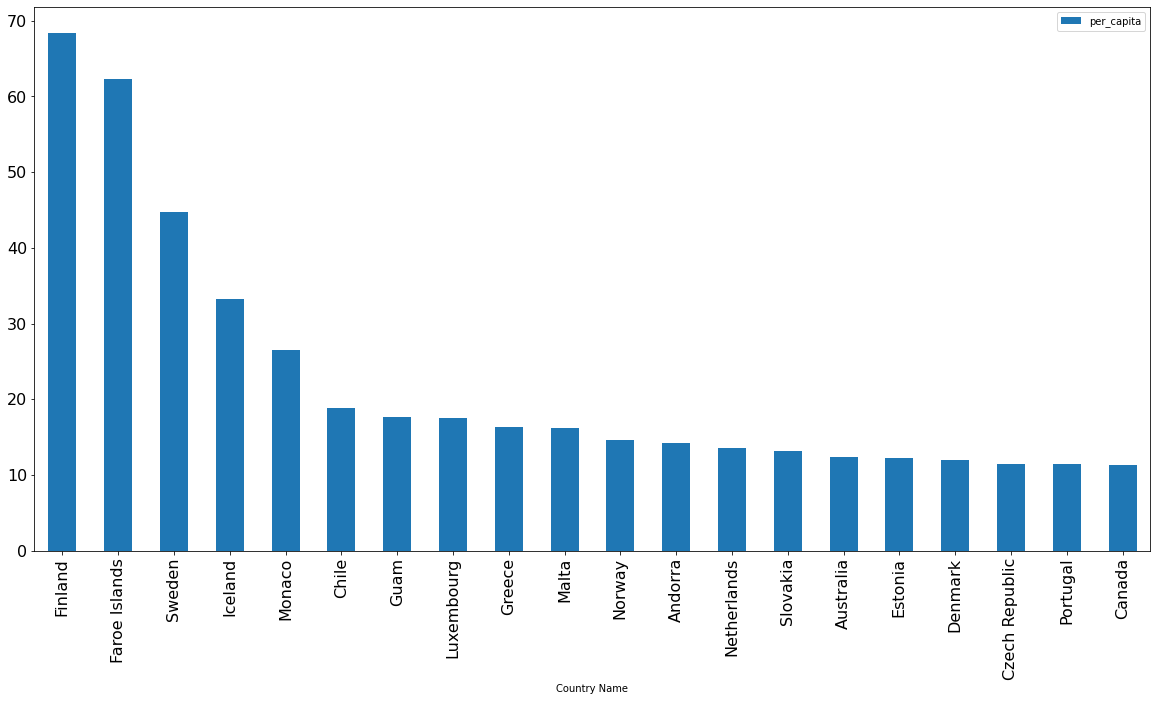

In [35]:
bands_pop[:20].plot('Country Name', 'per_capita', kind='bar', figsize=(20,10), fontsize=16)

# Summation Statistics

# Exporting Data